# Parkinson's Disease Dataset Analysis


## About Dataset
This dataset comprises comprehensive health information for 2,105 patients diagnosed with Parkinson's Disease, each uniquely identified with IDs ranging from 3058 to 5162. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis indicator. This dataset is valuable for researchers and data scientists aiming to explore factors associated with Parkinson's Disease, develop predictive models, and conduct statistical analyses.


## Importing Required Libraries and the Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

file_path = 'data/parkinsons_disease_data.csv'
parkinsons_data = pd.read_csv(file_path)

parkinsons_data.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


## Summary Statistics and Data Distribution

In [8]:
numerical_summary = parkinsons_data.describe()
numerical_summary


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
categorical_features = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryParkinsons', 
                        'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 
                        'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 
                        'SleepDisorders', 'Constipation', 'Diagnosis']
categorical_distribution = parkinsons_data[categorical_features].apply(pd.Series.value_counts)
categorical_distribution


,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,1068.0,1270,388,1481.0,1798.0,1881.0,1798.0,1793.0,1673.0,2002.0,1196.0,1573.0,1668.0,1813.0,1484.0,1589.0,1480.0,801.0
1,1037.0,425,840,624.0,307.0,224.0,307.0,312.0,432.0,103.0,909.0,532.0,437.0,292.0,621.0,516.0,625.0,1304.0
2,NaN,197,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,213,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for Missing Values

In [10]:
missing_values = parkinsons_data.isnull().sum()
missing_values


PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

## Correlation Analysis

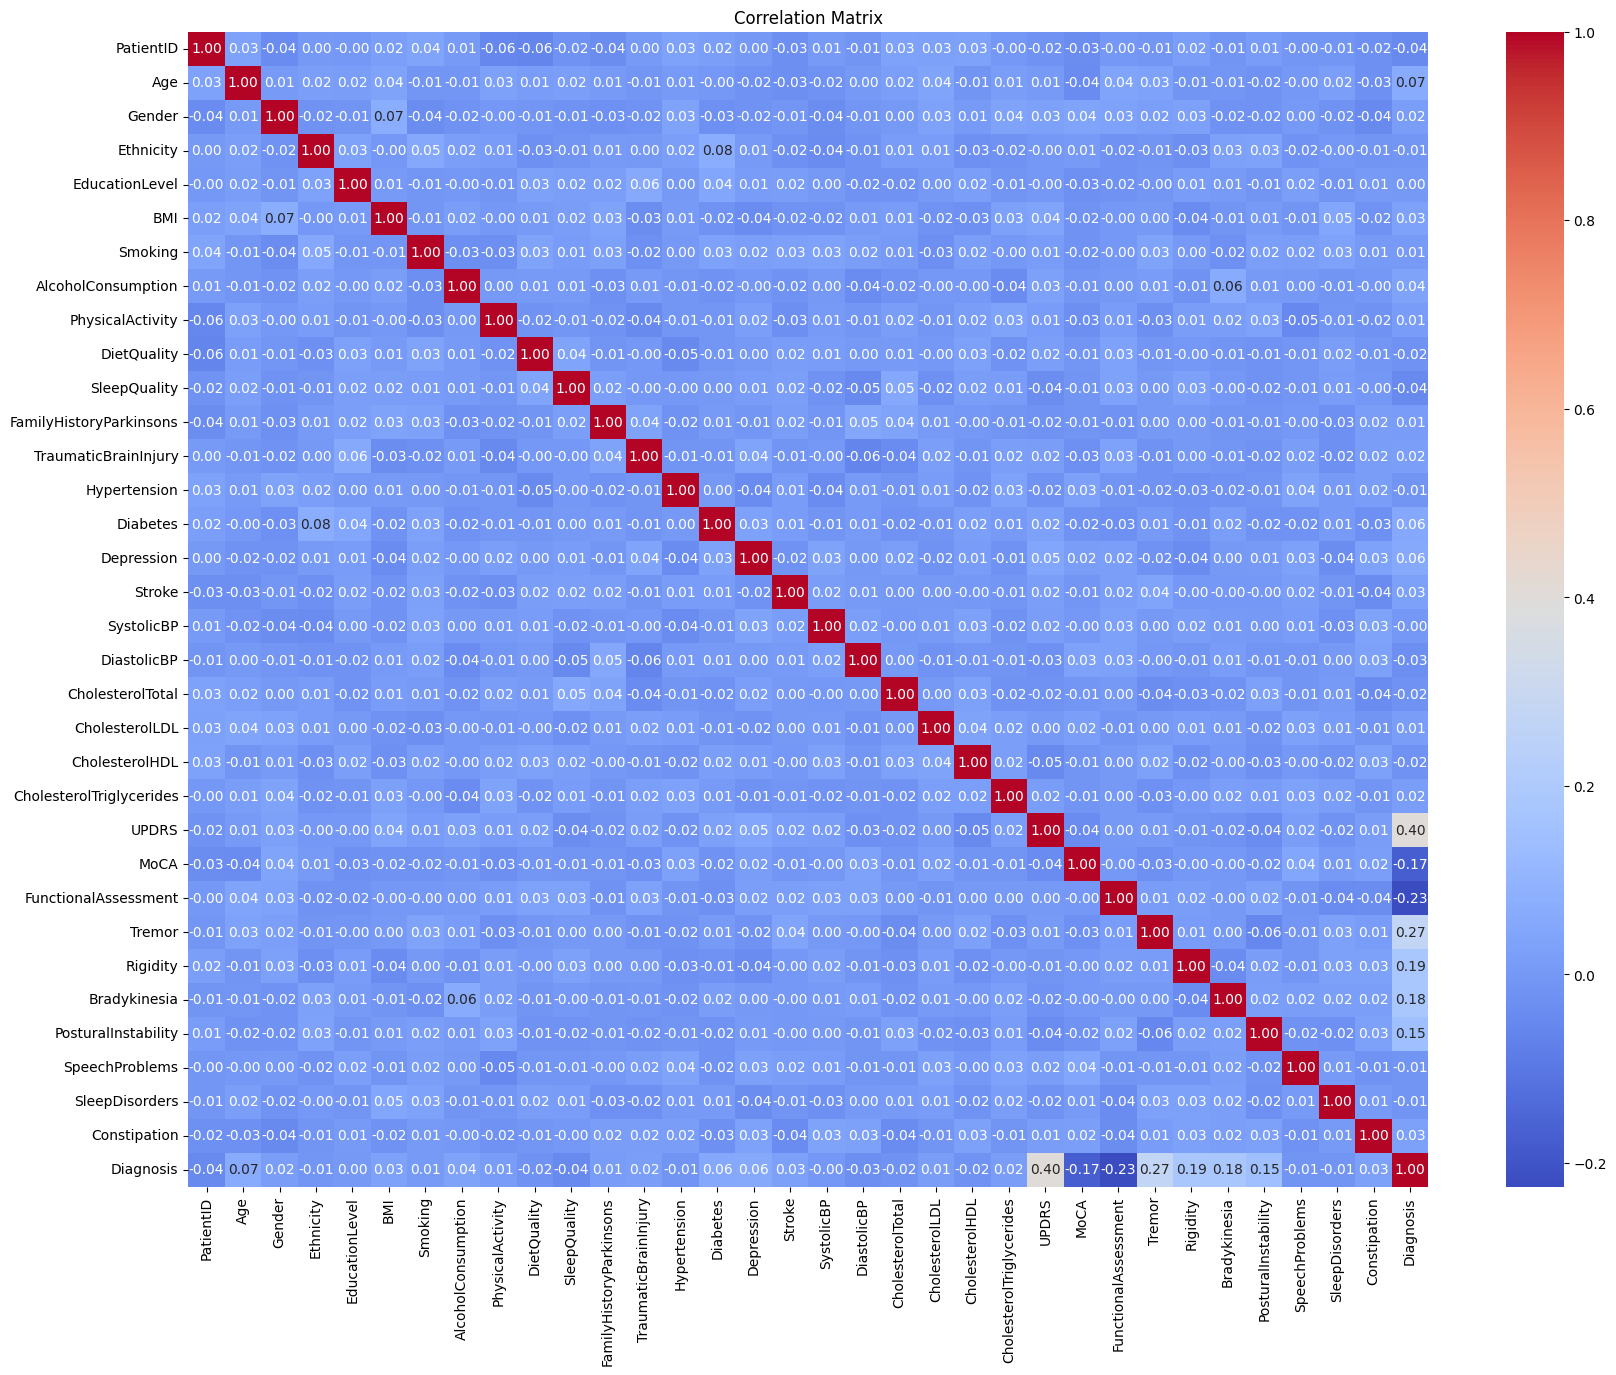

In [11]:
numerical_features = parkinsons_data.select_dtypes(include=np.number).columns
correlation_matrix = parkinsons_data[numerical_features].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Principal Component Analysis (PCA)

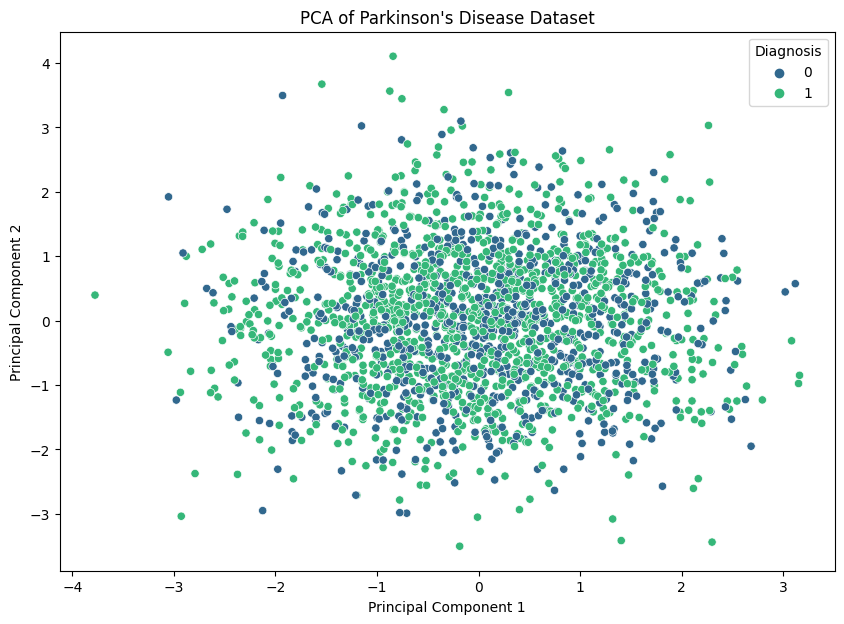

In [12]:
X = parkinsons_data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'])
y = parkinsons_data['Diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Diagnosis'] = y.values

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Diagnosis', data=pca_df, palette='viridis')
plt.title("PCA of Parkinson's Disease Dataset")
plt.show()


## Predictive Modeling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy Score: 0.8954869358669834
Confusion Matrix:
 [[133  17]
 [ 27 244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       150
           1       0.93      0.90      0.92       271

    accuracy                           0.90       421
   macro avg       0.88      0.89      0.89       421
weighted avg       0.90      0.90      0.90       421



## Feature Importance Analysis

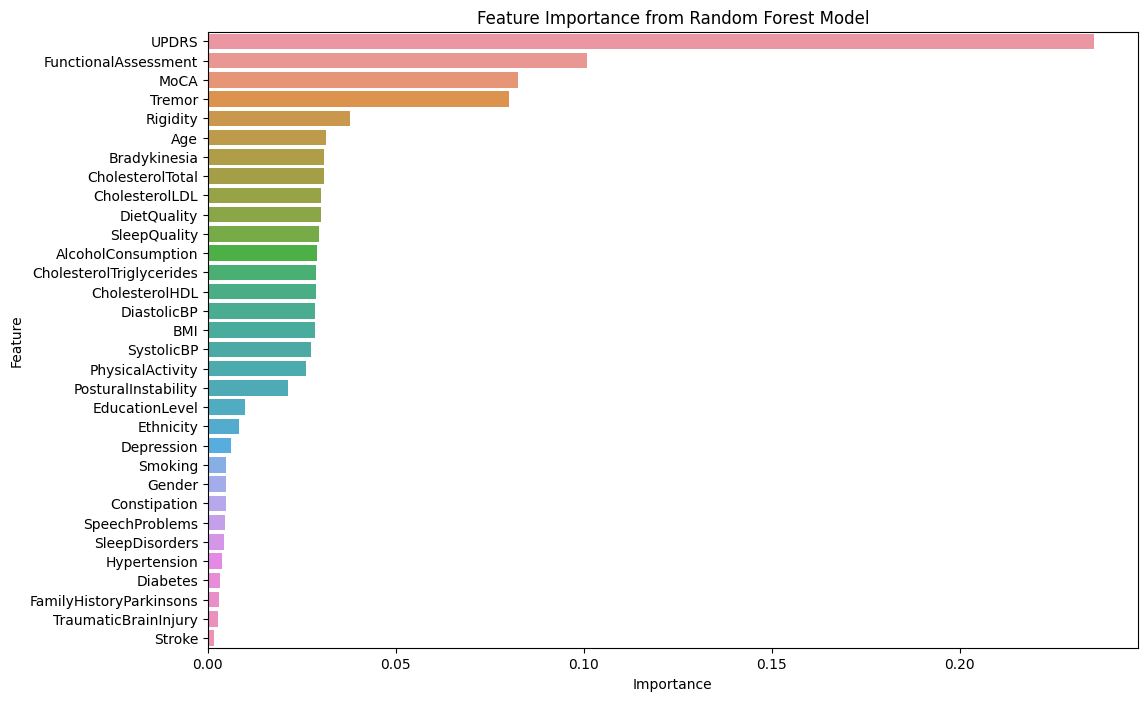

In [14]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()


## Hyperparameter Tuning

In [15]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [16]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

best_y_pred = best_rf_model.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, best_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, best_y_pred))
print('Classification Report:\n', classification_report(y_test, best_y_pred))


Accuracy Score: 0.9121140142517815
Confusion Matrix:
 [[138  12]
 [ 25 246]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       150
           1       0.95      0.91      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.91      0.91       421
weighted avg       0.92      0.91      0.91       421



## Cross-Validation

In [17]:
cv_scores = cross_val_score(best_rf_model, X_scaled, y, cv=10)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', np.mean(cv_scores))


Cross-Validation Scores: [0.93364929 0.96208531 0.92890995 0.93838863 0.97630332 0.93809524
 0.92857143 0.93333333 0.93809524 0.75238095]
Mean CV Score: 0.9229812683367186


## ROC and Precision-Recall Curves

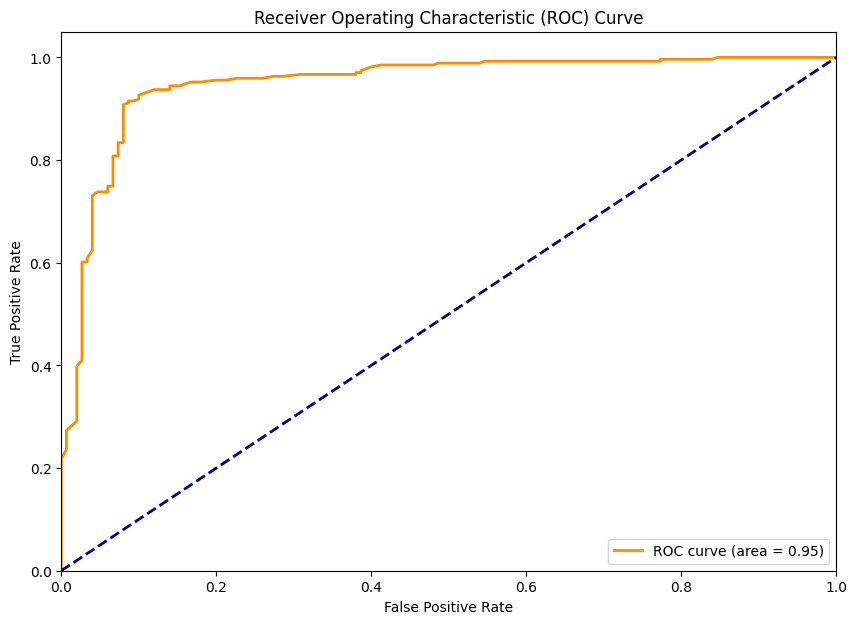

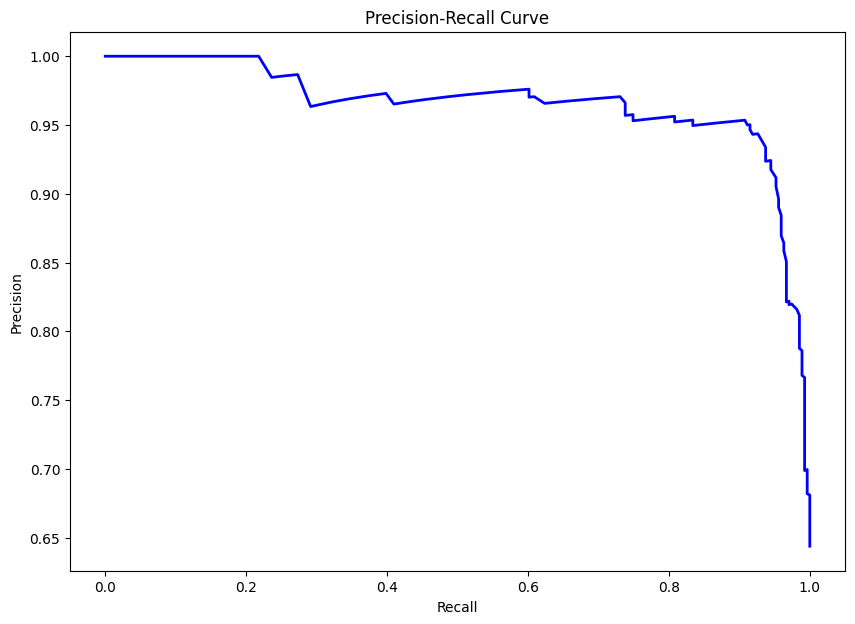

In [18]:

y_prob = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Clustering Analysis

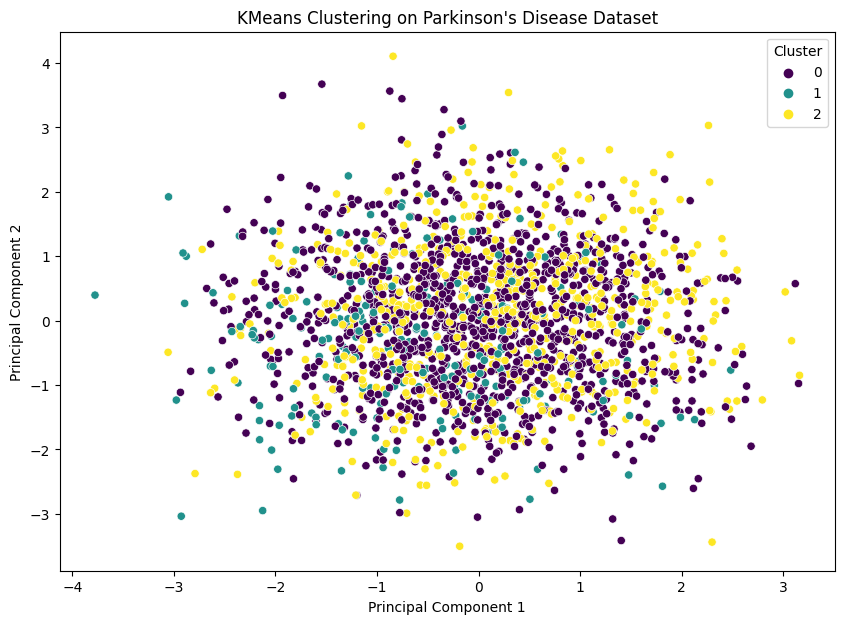

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis')
plt.title("KMeans Clustering on Parkinson's Disease Dataset")
plt.show()


## Conclusion


In this analysis, the Parkinson's Disease dataset is explored by performing the following steps:
- Loaded and examined the dataset.
- Conducted summary statistics and checked the distribution of categorical features.
- Checked for missing values in the dataset.
- Performed correlation analysis to understand the relationships between numerical features.
- Applied Principal Component Analysis (PCA) to reduce the dimensionality and visualize the dataset.
- Built and evaluated a predictive model using Random Forest Classifier.
- Analyzed feature importance using the Random Forest model.
- Performed hyperparameter tuning to improve the model's performance.
- Ensured model robustness through cross-validation.
- Created advanced visualizations including ROC and precision-recall curves.
- Applied clustering analysis to identify potential subgroups within the dataset.

This comprehensive analysis provides deeper insights into the factors associated with Parkinson's Disease and demonstrates various advanced techniques for data exploration and predictive modeling.
